In [2]:
import wget
wget.download("https://plus.unsplash.com/premium_photo-1675896084254-dcb626387e1e?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=935&q=80", "./temp_data/img_4.jpg")

'./temp_data/img_4.jpg'

In [1]:
import cv2
import numpy as np
import os
from PIL import Image
from tqdm import tqdm

In [4]:
def resize_watermark(img, watermark):
    w_height, w_width = watermark.shape[:2]
    ratio = w_width / w_height

    new_height = img.shape[0] // 7
    new_width = int(new_height * ratio)

    resized_watermark = cv2.resize(watermark, (new_width, new_height))

    return resized_watermark

In [5]:
def change_gray(watermark):
    gray_watermark = np.where(0<watermark, 255, watermark)
    return gray_watermark

In [6]:
def random_alpha_modify(tiled_pattern):
    height, width, _ = tiled_pattern.shape
    x = np.random.randint(0, int(width*0.7))
    y = np.random.randint(0, int(height*0.7))
    h = height//2
    w = width//2

    tiled_pattern[y:y+h, x:x+w, 3] *= 0.7

    return tiled_pattern

In [26]:
def visualize_numpy(np_array):
    img = Image.fromarray(np_array.astype(np.uint8))
    return img

In [8]:
def overlay(image, watermark, alpha_range=(0.08, 0.2), alpha_crop=True, gray=True):
    if gray==True:
        watermark = change_gray(watermark)
    
    watermark = resize_watermark(image, watermark)

    tile_x = image.shape[1] // watermark.shape[1] + 1
    tile_y = image.shape[0] // watermark.shape[0] + 1

    tiled_pattern = np.tile(watermark, (tile_y, tile_x, 1))
    tiled_pattern = tiled_pattern[:image.shape[0], :image.shape[1]]

    if alpha_crop==True:
        tiled_pattern = random_alpha_modify(tiled_pattern)

    pattern_bgr = tiled_pattern[..., :3]
    pattern_alpha = tiled_pattern[..., 3]

    alpha_mask = cv2.merge([pattern_alpha, pattern_alpha, pattern_alpha]) / 255.0 * np.random.uniform(*alpha_range)

    watermark_mask = pattern_bgr * alpha_mask
    overlay = watermark_mask + image * (1 - alpha_mask)
    overlay = overlay.astype(np.uint8)

    return overlay, watermark_mask

In [9]:
def main(watermark_dir, image_dir, save_dir, overlay_iter=3):
    
    watermark_paths = [(os.path.join(watermark_dir, cur), os.path.splitext(cur)[0]) for cur in os.listdir(watermark_dir)]
    image_paths = [(os.path.join(image_dir, cur), os.path.splitext(cur)[0]) for cur in os.listdir(image_dir)]

    for image_path, img_fn in tqdm(image_paths, total=len(image_paths), leave=True):
        image = cv2.imread(image_path).astype(np.float64)

        for watermark_path, watermark_fn in watermark_paths:
            watermark = cv2.imread(watermark_path, -1).astype(np.float64)

            for idx in range(overlay_iter):
                if np.random.randint(0,10) % 2 == 0:
                    output, watermark_mask = overlay(image, watermark, (0.05, 0.18), gray=True)
                else:
                    output, watermark_mask = overlay(image, watermark, (0.08, 0.2), gray=False)
                
                output = output.astype(np.uint8)
                output, watermark_mask = overlay(image, watermark, (0.08, 0.2), gray=False)

                cv2.imwrite(os.path.join(save_dir, f"{img_fn}_{watermark_fn}_{idx}.png"), output)
                cv2.imwrite(os.path.join(save_dir, f"{img_fn}_{watermark_fn}_{idx}_mask.png"), watermark_mask)

In [8]:
main("./watermark", "./temp_data", "./result", overlay_iter=1)

100%|██████████| 3/3 [00:15<00:00,  5.08s/it]


In [10]:
img = cv2.imread("./data/1000_perso").astype(np.float64)
watermark = cv2.imread("./watermark/m1.png", -1).astype(np.float64)

In [13]:
overlay2, watermark_mask = overlay(img, watermark, alpha_crop=False, gray=False)

In [31]:
def random_mask_crop(tiled_pattern, crop_size):
    wm_height, wm_width = crop_size
    height, width, _ = tiled_pattern.shape
    x = np.random.randint(0, height - wm_height)
    y = np.random.randint(0, width - wm_width)
    h = wm_height
    w = wm_width

    random_croped_watermark = tiled_pattern[y:y+h, x:x+w, :]

    return random_croped_watermark

In [32]:
random_croped_watermark = random_mask_crop(watermark_mask, watermark.shape[:2])

(224, 449, 3)


In [36]:
def make_tiled_watermark_pattern(watermark):
    tile_x = 1000 // watermark.shape[1] + 1
    tile_y = 1000 // watermark.shape[0] + 1

    tiled_pattern = np.tile(watermark, (tile_y, tile_x, 1))
    tiled_pattern = tiled_pattern[:1000, :1000]
    return tiled_pattern

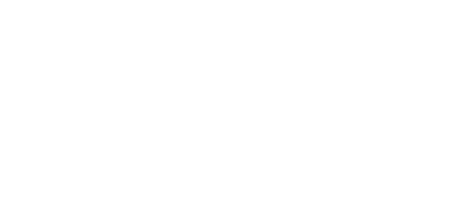

In [35]:
visualize_numpy(watermark)

All image is valid?

In [13]:
import os
from PIL import Image

root_dir = "/media/mlfavorfit/sda/watermark_removal_dataset/with_watermark_gray/train/target"
file_list = os.listdir(root_dir)

In [14]:
for fn in file_list:
    try:
        Image.open(os.path.join(root_dir, fn))
    except:
        print(fn, "is not valid!")

/home/mlfavorfit/anaconda3/envs/kjg_ver39/lib/python3.9/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/mlfavorfit/anaconda3/envs/kjg_ver39/lib/python3.9/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (99434904 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/mlfavorfit/anaconda3/envs/kjg_ver39/lib/python3.9/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/mlfavorfit/anaconda3/envs/kjg_ver39/lib/python3.9/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (90525000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/mlfavorfit/anaconda3/envs/kjg_ver39/lib/python3.9/si

Re ordering image

In [29]:
import os
import re

In [30]:
train_path = "/media/mlfavorfit/sda/watermark_removal_dataset/with_watermark_gray/train/target"
val_path = "/media/mlfavorfit/sda/watermark_removal_dataset/with_watermark_gray/val/target"

In [31]:
for idx, file in enumerate(os.listdir(train_path)):
    file_path = os.path.join(train_path, file)
    os.rename(file_path, os.path.join(train_path, str(idx)+".jpg"))

In [32]:
len(os.listdir(train_path))

1635

In [33]:
for idx, file in enumerate(os.listdir(val_path)):
    file_path = os.path.join(val_path, file)
    os.rename(file_path, os.path.join(val_path, str(idx+len(os.listdir(train_path)))+".jpg"))

In [20]:
temp = os.listdir(train_path)

In [21]:
def custom_sort(s):
    s = s.split(".")[0]
    return (len(s), int(s))

sorted_numbers_as_str = sorted(temp, key=custom_sort)

print(sorted_numbers_as_str) 

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg'

In [22]:
def natural_sort_key(s):
    # Convert text to a list of strings and integers
    return [int(text) if text.isdigit() else text for text in re.split('([0-9]+)', str(s))]
    
sorted_numbers_as_str = sorted(temp, key=natural_sort_key)

print(sorted_numbers_as_str) 

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg'

In [23]:
for target, cur in zip(sorted_numbers_as_str, sorted(temp)):
    file_path = os.path.join(train_path, cur)
    os.rename(file_path, os.path.join(train_path, target))
    

Make only solid black mask

In [37]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

image_dir = '/media/mlfavorfit/sda/watermark_removal_dataset_temp/prevent_overfitting/train/image' 
mask_dir = '/media/mlfavorfit/sda/watermark_removal_dataset_temp/prevent_overfitting/train/mask' 

In [38]:
file_list = os.listdir(image_dir)

for file_name in tqdm(file_list, leave=True, total=len(file_list)):
    file_path = os.path.join(image_dir, file_name)
    width, height = Image.open(file_path).size
    
    mask_np = np.zeros((height, width, 3), dtype=np.uint8)
    mask_image = Image.fromarray(mask_np)

    mask_image_path = os.path.join(mask_dir, file_name.split(".")[0] + "_m.png")
    mask_image.save(mask_image_path)

 39%|███▉      | 641/1650 [02:21<03:39,  4.59it/s]/home/mlfavorfit/anaconda3/envs/kjg_ver39/lib/python3.9/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (89983405 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 1650/1650 [06:08<00:00,  4.47it/s]


Change storage of image

In [2]:
from tqdm import tqdm
import os

In [6]:
root_dir = "/media/mlfavorfit/sda/watermark_removal_dataset_temp/val/image/"

file_list = os.listdir(root_dir)

for idx, file_name in enumerate(file_list):
    print(file_name, idx, end="\r")
    image_path = os.path.join(root_dir, file_name)
    
    if ".png" in image_path:
        os.remove(image_path)


In [9]:
root_dir = "/media/mlfavorfit/sda/watermark_removal_dataset/train/image/"

file_list = os.listdir(root_dir)

In [17]:
for idx, file_name in enumerate(file_list):
    print(file_name, idx, end="\r")
    image_path = os.path.join(root_dir, file_name)
    img = Image.open(image_path)
    
    new_file_name = file_name.split(".")[0] + ".jpg"
    img.save(os.path.join(root_dir, new_file_name))


/home/mlfavorfit/anaconda3/envs/kjg_ver39/lib/python3.9/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


KeyboardInterrupt: 

In [13]:
image_path = os.path.join(root_dir, file_list[1])
img = Image.open(image_path)